In [1]:
import iplantuml

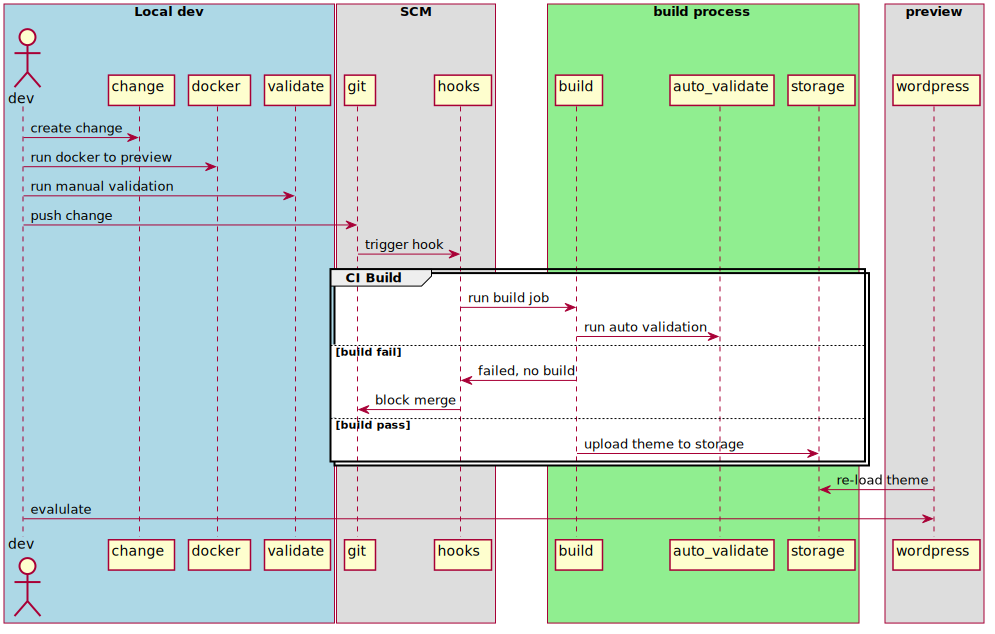

In [45]:
%%plantuml --name dev_themes

@startuml

box "Local dev" #LightBlue
actor dev
    dev -> change: create change
    dev -> docker: run docker to preview
    dev -> validate: run manual validation
end box

box "SCM"
    dev -> git: push change
    git -> hooks: trigger hook
end box

box "build process" #LightGreen
group CI Build
    hooks -> build: run build job
    build -> auto_validate: run auto validation
else build fail
    build -> hooks: failed, no build
    hooks -> git: block merge
else build pass
    build -> storage: upload theme to storage 
end
end box

box "preview"
wordpress -> storage: re-load theme
dev -> wordpress: evalulate
end box
@enduml